In [ ]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import numpy as np
import seaborn as sns

# 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=20).get_name() # 기본 폰트 사이즈 : 20
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Ch1. 헬로 파이썬

## 1.6 matplotlib

### 1.6.3 이미지 표시하기

In [ ]:
from matplotlib.image import imread

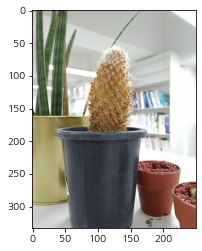

In [ ]:
img = imread('/content/drive/MyDrive/Colab_Notebooks/밑바닥_딥러닝/deep-learning-from-scratch-master/dataset/cactus.png')

plt.imshow(img)
plt.show()

# Ch2. 퍼셉트론

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

In [3]:
# AND 게이트
def AND(x1, x2) :
    w1, w2, theta = (0.5, 0.5, 0.7)
    tmp = x1*w1 + x2*w2
    if tmp <= theta :
        return 0
    elif tmp > theta :
        return 1

In [ ]:
AND(0, 0)

0

In [ ]:
AND(1, 0)

0

In [ ]:
AND(0, 1)

0

In [ ]:
AND(1, 1)

1

### 2.3.2 가중치와 편향 도입

In [ ]:
x = np.array([0,1])
w = np.array([0.5, 0.5])
b = -0.7

In [ ]:
x*w

array([0. , 0.5])

In [ ]:
np.sum(x*w)

0.5

In [ ]:
np.sum(x*w)+b

-0.19999999999999996

### 2.3.3 가중치와 편향 구현하기

In [4]:
# 가중치와 편향을 구현한 AND 게이트
def AND(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0 :
        return 0
    else :
        return 1

In [5]:
# NAND 게이트
def NAND(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0 :
        return 0
    else :
        return 1

# OR 게이트
def OR(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(x*w) + b
    if tmp <= 0 :
        return 0
    else :
        return 1

## 2.5 다층 퍼셉트론이 충돌한다면

### 2.5.2 XOR 게이트 구현하기

In [6]:
# XOR 게이트
def XOR(x1, x2) :
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
XOR(0, 0)

0

In [ ]:
XOR(1, 0)

1

In [ ]:
XOR(0, 1)

1

In [ ]:
XOR(1, 1)

0

# Chapter 3. 신경망

## 3.2 활성화 함수

### 3.2.2 계단 함수 구현하기

In [7]:
def step_function(x) :
    if x > 0 :
        return 1
    else :
        return 0

> 위의 함수는 단순하고 쉽지만, 인수 x에 실수만 받아들일 수 있다.<br>
넘파이 배열을 인수로 넣을 수 있도록 하기 위해 아래와 같이 수정하자.

In [16]:
def step_function(x) :
    y = x > 0
    return y.astype(int)

> 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성됨을 이용하여,<br>
0이나 1을 출력하는 계단함수로 변환하기 위해 다시 int형을 출력하도록 한다.

In [9]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [11]:
y = x > 0
y

array([False,  True,  True])

In [15]:
y = y.astype(int)
y

array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

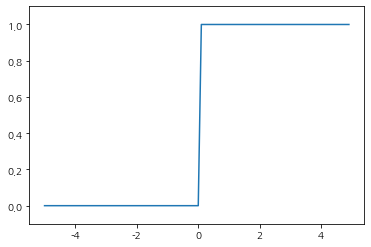

In [18]:
def step_function(x) :
    return np.array(x>0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

> 시그모이드 함수(sigmoid function)
- 신경망에서 자주 이용하는 활성화 함수 중 하나이다.
- 계단함수에 비해서 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다.
    - 이러한 매끈함은 신경망 학습에서 중요한 역할을 한다.
- 계단함수는 0과 1 중 하나의 값만 돌려주는 반면, 시그모이드 함수는 실수를 반환한다.

In [19]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

In [20]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

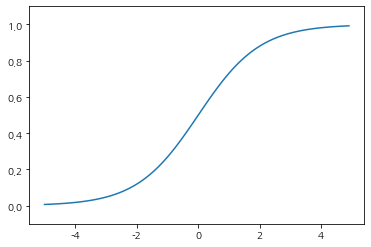

In [21]:
# 시그모이드 함수 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.7 ReLU 함수

> ReLU 함수
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.

> - `np.maximum(x,y)` : 두 입력 중 큰 값을 선택해 반환

In [ ]:
def relu(x) :
    return np.maximum(0, x)

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

> - `np.ndim()` : 배열의 차원 수를 반환
- `X.shape()` or `np.shape(X)` : 배열의 형상을 반환

In [22]:
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [23]:
np.ndim(A)

1

In [25]:
A.shape

(4,)

In [26]:
A.shape[0]

4

In [27]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [28]:
np.ndim(B)

2

In [29]:
B.shape

(3, 2)

### 3.3.2 행렬의 곱

In [30]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [31]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

> - `np.dot(X,Y)` : 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬의 곱 계산

In [32]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

> 행렬을 곱할 때 `np.dot(A,B)`와 `np.dot(B,A)`는 다른 값이 될 수 있다는 점을 주의

In [33]:
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [34]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [35]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [37]:
np.dot(B,A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

> 행렬의 곱셈을 할 때 **`앞 행렬의 열`과 `뒷 행렬의 행`은 같아야 한다**

In [38]:
C = np.array([[1,2], [3,4]])
C.shape

(2, 2)

In [39]:
A.shape

(2, 3)

In [40]:
np.dot(A,C)

ValueError: ignored

### 3.3.3 신경망에서의 행렬 곱

In [41]:
X = np.array([1,2])
X.shape

(2,)

In [43]:
W = np.array([[1,3,5], [2,4,6]])
print(W)
W.shape

[[1 3 5]
 [2 4 6]]


(2, 3)

In [44]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기
> 여기서는 입력층(0층) 2개, 첫 번째 은닉층(1층) 3개, 두 번째 은닉층(2층) 2개, 출력층(3층) 2개의 뉴런으로 구성된 3층 신경망을 구현해볼 것이다.

In [45]:
# 입력층에서 1층으로의 신호 전달
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [46]:
# 활성화 함수로 시그모이드 함수 사용
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [48]:
# 1층에서 2층으로의 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [49]:
# 2층에서 출력층으로의 신호 전달(새로운 활성화 함수 사용)
def identity_function(x) :
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

> 위의 예시에서 출력층의 활성화 함수는 입력을 그대로 출력하는 **항등함수**를 사용하였다<br>
출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.

### 3.4.3 구현 정리

In [50]:
def init_network() :
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x) :
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

> 신경망은 분류와 회귀 모두에 이용 가능하다.<br>
다만 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.
- 분류(classification)
    - 데이터가 어느 클래스(Class)에 속하는지 구분
    - 일반적으로 활성화 함수로 소프트맥스 함수를 사용한다.
- 회귀(regression)
    - 입력 데이터에서 (연속적인) 수치를 예측
        - ex) 사진 속 인물의 몸무게 예측
    - 일반적으로 활성화 함수로 항등함수를 사용한다.

### 3.4.1 항등 함수와 소프트맥스 함수 구현하기

In [51]:
# 소프트맥스 함수(softmax function)
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [52]:
def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

> 소프트맥스 함수는 지수 함수를 사용하기 때문에 오버플로 문제가 발생할 수 있다.
- 오버플로(overflow) : 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없는 문제

> 이러한 오버플로를 막을 목적으로 입력 신호 중 최대값을 빼준다.
- 이는 소프트맥스 함수를 개선한 수식을 통해 확인한<br>
`소프트맥스의 지수 함수 계산에 어떠한 정수를 더하거나 빼도 결과는 바뀌지 않는다`는 특성을 이용한 것이다.

In [53]:
# 오버플로 예시
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan])

In [54]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [55]:
# 개선한 수식은 계산이 된다.
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

> 이에 따라서 함수를 조금 수정하자.

In [56]:
def softmax(a) :
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수의 특징

> - 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이며, 출력의 총합은 1이다.
    - 이러한 성질로 인해 소프트맥스 함수의 출력을 **확률**로 해석할 수 있다.
- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다.
    - ex) a에서 가장 큰 원소가 2번째이면, y에서 가장 큰 원소도 2번째이다.
    - 지수함수(y=exp(x))가 단조 증가 함수이기 때문
        - `단조 증가 함수` : 정의역 원소 a,b가 a<=b일 때, f(a) <= f(b)가 성립하는 함수

## 3.6 손글씨 숫자 인식